# Exploring Baseball Strike Zones with Machine Learning

In this project, I will harness the power of Support Vector Machines (SVMs) to uncover the elusive decision boundary that defines the strike zone in Major League Baseball (MLB). SVMs are formidable machine learning models known for their ability to create intricate decision boundaries that adapt to the training data.

**Key Project Objectives:**

1. **Explore the Data**: To kick off this project, we'll embark on a comprehensive exploration of datasets related to two prominent baseball players, Aaron Judge and Jose Altuve. With an eye for detail, we'll dive into the features of each pitch they faced during the 2017 season.

2. **Decipher Pitch Descriptions**: Before we swing for the fences, it's crucial to decode the pitch descriptions. We'll unravel the mystery behind these descriptions and gain a profound understanding of how balls and strikes are meticulously recorded.

3. **Label Data for Classification**: To make our analysis more effective, we'll transform the string labels 'S' and 'B' into numerical values. This conversion will pave the way for seamless data preparation and modeling.

4. **Visualize Pitch Locations**: Armed with clean data, we'll create insightful visualizations to understand how the pitch's location, represented by 'plate_x' and 'plate_z' columns, influences its classification.

5. **Build an SVM Model**: The heart of our project lies in constructing an SVM model capable of creating a decision boundary that mirrors the real strike zone. We'll split the data into training and validation sets for model validation.

6. **Visualize the Decision Boundary**: To provide a visual representation of our SVM's decision-making prowess, we've crafted a custom function called `draw_boundary`. This function will help us understand how the SVM classifies pitches.

7. **Assess Model Accuracy**: We won't be swinging blindly. We'll assess the accuracy of our SVM classifier to gauge its performance in predicting balls and strikes.

8. **Optimize SVM Parameters**: Seeking perfection, we'll experiment with SVM parameters such as gamma and C to discover the optimal configuration that outperforms previous models.

9. **Explore Other Players**: Beyond Aaron Judge and Jose Altuve, we'll extend our exploration to other players, like David Ortiz. This comparative analysis will allow us to gain insights into how different players' strike zones vary.

10. **Enhance SVM with Additional Features**: In our quest for perfection, we'll explore the inclusion of additional features, such as the count of strikes. These extra dimensions might be the key to a more accurate classifier.

Join me in this riveting journey into the realm of baseball strike zones, where we'll deploy machine learning to unlock hidden patterns and gain a deeper appreciation for the intricate art and science of America's favorite pastime.


-------

## Install Missing Packages

In [7]:
#!pip install pybaseball

## Load Libraries

In [47]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from svm_visualization import draw_boundary
from pybaseball import statcast, playerid_lookup, statcast_batter

## Load Data

In [9]:
# Get statcast data
statcast(start_dt="2017-04-02", end_dt="2017-09-30").columns

This is a large query, it may take a moment to complete


C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pybaseball\statcast.py:50: UserWarning: 
That's a nice request you got there. It'd be a shame if something were to happen to it.
We strongly recommend that you enable caching before running this. It's as simple as `pybaseball.cache.enable()`.
Since the Statcast requests can take a *really* long time to run, if something were to happen, like: a disconnect;
gremlins; computer repair by associates of Rudy Giuliani; electromagnetic interference from metal trash cans; etc.;
you could lose a lot of progress. Enabling caching will allow you to immediately recover all the successful
subqueries if that happens.
  warnings.warn(_OVERSIZE_WARNING)
100%|██████████| 182/182 [02:45<00:00,  1.10it/s]
C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\pybaseball\statcast.py:85: Fu

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher.1',
       'fielder_2.1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

### Look-up Aaron Judge Stats

In [49]:
playerid_lookup('Judge', 'Aaron')

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,judge,aaron,592450,judga001,judgeaa01,15640,2016.0,2023.0


In [50]:
judge_stats = statcast_batter('2017-04-02', '2020-09-30', 592450)
judge_stats

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CU,2020-09-30,83.5,-1.30,5.75,"Judge, Aaron",592450,471911,strikeout,swinging_strike,...,4,1,4,1,4,Infield shift,Standard,82.0,0.009,-0.079
1,SL,2020-09-30,86.1,-1.57,5.61,"Judge, Aaron",592450,471911,NaN,swinging_strike,...,4,1,4,1,4,Infield shift,Standard,69.0,0.000,-0.029
2,FF,2020-09-30,93.5,-1.42,5.73,"Judge, Aaron",592450,471911,NaN,ball,...,4,1,4,1,4,Infield shift,Standard,232.0,0.000,0.013
3,FF,2020-09-30,91.9,-1.25,5.81,"Judge, Aaron",592450,471911,NaN,called_strike,...,4,1,4,1,4,Infield shift,Standard,231.0,0.000,-0.017
4,SL,2020-09-30,83.3,-2.30,5.96,"Judge, Aaron",592450,621295,walk,ball,...,8,8,8,8,8,Standard,Standard,78.0,-0.066,0.237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8362,SL,2017-04-02,86.1,-1.34,6.50,"Judge, Aaron",592450,502042,double,hit_into_play,...,3,1,3,1,3,Infield shift,Standard,25.0,-0.136,1.560
8363,FF,2017-04-02,92.6,-0.23,5.99,"Judge, Aaron",592450,643493,fielders_choice,hit_into_play,...,7,2,7,2,7,Infield shift,Standard,204.0,-0.018,0.668
8364,SL,2017-04-02,88.5,-0.25,5.97,"Judge, Aaron",592450,643493,NaN,ball,...,7,2,7,2,7,Infield shift,Standard,267.0,0.000,0.102
8365,SL,2017-04-02,89.0,-0.25,5.90,"Judge, Aaron",592450,643493,NaN,ball,...,7,2,7,2,7,Infield shift,Strategic,191.0,0.000,0.042


### Look-up Jose Altuve Stats

In [51]:
altuve_stats = statcast_batter('2017-04-03', '2017-10-01', playerid_lookup('altuve', 'jose').key_mlbam.iloc[0])
altuve_stats

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,CH,2017-10-01,83.4,-1.50,5.72,"Altuve, Jose",514888,584171,field_out,hit_into_play,...,0,0,0,0,0,Standard,Standard,269.0,0.020,-0.387
1,SI,2017-10-01,88.6,-1.58,5.90,"Altuve, Jose",514888,584171,field_out,hit_into_play,...,0,0,0,0,0,Standard,Standard,244.0,0.022,-0.245
2,KC,2017-09-30,77.8,1.84,6.57,"Altuve, Jose",514888,519141,single,hit_into_play,...,5,0,5,0,5,Standard,Standard,341.0,-0.015,0.459
3,KC,2017-09-30,77.0,1.89,6.53,"Altuve, Jose",514888,519141,NaN,called_strike,...,5,0,5,0,5,Standard,Standard,339.0,0.000,-0.062
4,KC,2017-09-30,76.9,1.84,6.53,"Altuve, Jose",514888,519141,NaN,foul,...,5,0,5,0,5,Standard,Standard,338.0,0.000,-0.046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2303,SL,2017-04-03,85.0,-2.12,6.03,"Altuve, Jose",514888,433587,NaN,called_strike,...,0,0,1,1,0,Standard,Standard,72.0,0.000,-0.084
2304,SI,2017-04-03,91.9,-2.16,5.71,"Altuve, Jose",514888,502272,NaN,ball,...,0,0,3,3,0,Standard,Standard,221.0,0.000,0.010
2305,FF,2017-04-03,95.2,-1.98,5.93,"Altuve, Jose",514888,502272,NaN,called_strike,...,0,0,3,3,0,Standard,Standard,199.0,0.000,-0.025
2306,SI,2017-04-03,90.2,-2.20,5.98,"Altuve, Jose",514888,433587,NaN,ball,...,0,0,1,1,0,Standard,Standard,243.0,0.000,0.065


### Look-up David Ortiz Stats

In [52]:
ortiz_stats = statcast_batter('2015-04-02', '2015-10-02', playerid_lookup('ortiz', 'david').key_mlbam.iloc[0])
ortiz_stats

Gathering Player Data


,pitch_type,game_date,release_speed,release_pos_x,release_pos_z,player_name,batter,pitcher,events,description,...,fld_score,post_away_score,post_home_score,post_bat_score,post_fld_score,if_fielding_alignment,of_fielding_alignment,spin_axis,delta_home_win_exp,delta_run_exp
0,FC,2015-10-02,87.0,-0.97,5.63,"Ortiz, David",120074,458708,field_out,hit_into_play,...,7,2,7,2,7,Infield shift,Strategic,NaN,0.008,-0.212
1,FC,2015-10-02,82.0,-0.68,5.93,"Ortiz, David",120074,458708,NaN,called_strike,...,7,2,7,2,7,Infield shift,Strategic,NaN,0.000,-0.044
2,CH,2015-10-02,85.3,-0.91,5.80,"Ortiz, David",120074,458708,NaN,ball,...,7,2,7,2,7,Infield shift,Strategic,NaN,0.000,0.032
3,FF,2015-10-02,87.0,-0.91,5.79,"Ortiz, David",120074,458708,home_run,hit_into_play,...,4,2,4,2,4,Infield shift,Standard,NaN,-0.122,1.886
4,CH,2015-10-02,81.1,-1.23,5.73,"Ortiz, David",120074,458708,NaN,called_strike,...,4,0,4,0,4,Infield shift,Standard,NaN,0.000,-0.044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2479,NaN,2015-04-03,NaN,NaN,NaN,"Ortiz, David",120074,430641,NaN,ball,...,5,5,2,2,5,NaN,NaN,NaN,0.000,NaN
2480,NaN,2015-04-03,NaN,NaN,NaN,"Ortiz, David",120074,445060,field_out,hit_into_play,...,0,0,0,0,0,NaN,NaN,NaN,-0.028,NaN
2481,NaN,2015-04-02,NaN,NaN,NaN,"Ortiz, David",120074,429722,field_out,hit_into_play,...,1,0,1,0,1,NaN,NaN,NaN,0.013,NaN
2482,NaN,2015-04-02,NaN,NaN,NaN,"Ortiz, David",120074,429722,field_out,hit_into_play,...,0,0,0,0,0,NaN,NaN,NaN,0.010,NaN


Aaron Judge:


C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8458942632170978


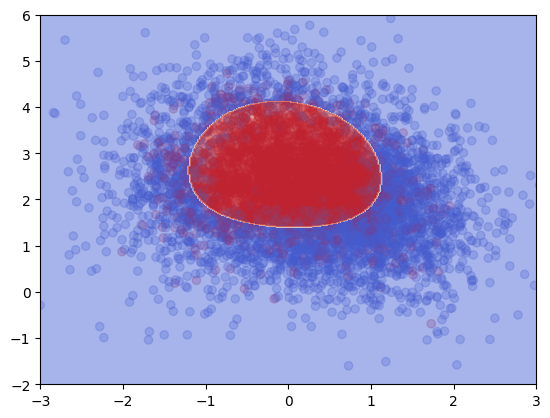

Jose Altuve:


C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8571428571428571


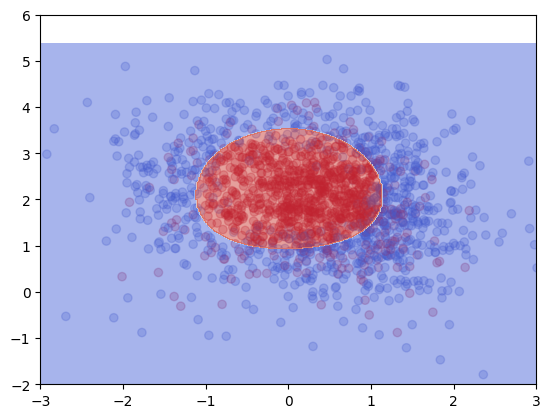

David Ortiz:


C:\Users\Marc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


Accuracy: 0.8402366863905325


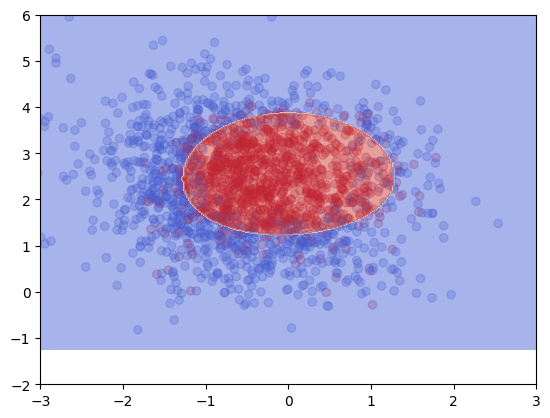

In [53]:
def visualize_strike_zone(player_data):
    fig, ax = plt.subplots()
    
    # Create the labels
    player_data['type'] = player_data['type'].map({'B': 0, 'S': 1})
    
    # Remove rows with NaN values
    player_data = player_data.dropna(subset=['plate_x', 'plate_z', 'type'])

    plt.scatter(player_data['plate_x'], player_data['plate_z'], c=player_data['type'], cmap=plt.cm.coolwarm, alpha=0.25)

    # Split the data into a training set and a validation set
    training_set, validation_set = train_test_split(player_data, random_state=1)

    classifier = SVC(kernel='rbf')
    classifier.fit(training_set[['plate_x', 'plate_z']], training_set['type'])

    draw_boundary(ax, classifier)
    
    # Set consistent axes limits for comparison
    ax.set_ylim(-2, 6)
    ax.set_xlim(-3, 3)
    
    # Get accuracy of the model by predicting on the validation set
    accuracy = classifier.score(validation_set[['plate_x', 'plate_z']], validation_set['type'])
    print("Accuracy:", accuracy)
    
    plt.show()

# Visualize Aaron Judge's strike zone
print("Aaron Judge:")
visualize_strike_zone(judge_stats)

# Visualize Jose Altuve's strike zone
print("Jose Altuve:")
visualize_strike_zone(altuve_stats)

# Visualize David Ortiz's strike zone
print("David Ortiz:")
visualize_strike_zone(ortiz_stats)
